In [1]:
import pandas as pd 
import os
from matplotlib import pyplot as plt
import os

In [2]:
curr_work_directory = os.getcwd()

filepath = curr_work_directory + "\merged_aasee_monitoring_data.csv"
df = pd.read_csv(filepath, sep=",",index_col=0)

filepath_preprocessed = curr_work_directory + "\merged_preprocessed_aasee_monitoring_data.csv"
df_preprocessed = pd.read_csv(filepath_preprocessed, sep=",", index_col=0)

temperature_filepath = curr_work_directory + "\weather_data.json"
df_temperature = pd.read_json(temperature_filepath)

In [3]:
df.head()

,Datum,Wassertemperatur,pH-Wert,Sauerstoffgehalt
0,2021-05-18 22:29,16.78,8.32,14.91
1,2021-05-18 22:29,16.78,8.32,14.91
2,2021-05-18 22:38,16.76,8.33,14.82
3,2021-05-18 22:47,16.78,8.31,14.79
4,2021-05-18 22:59,16.76,8.30,14.79


In [4]:
df_temperature.head()

,timestamp,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,condition,fallback_source_ids,icon
0,2021-05-18 00:00:00+00:00,96882,0.0,1009.5,NaN,9.7,250,9.7,100,8.4,NaN,15000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
1,2021-05-18 01:00:00+00:00,96882,0.0,1009.8,NaN,9.8,240,8.6,100,8.6,NaN,15000,NaN,13.0,rain,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
2,2021-05-18 02:00:00+00:00,96882,0.0,1010.1,NaN,9.8,230,9.7,100,8.3,NaN,15000,NaN,16.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
3,2021-05-18 03:00:00+00:00,96882,0.0,1010.2,NaN,8.0,230,8.3,75,7.3,NaN,12000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-night
4,2021-05-18 04:00:00+00:00,96882,0.0,1010.4,NaN,6.9,250,4.0,75,6.9,NaN,7000,NaN,7.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30822 entries, 0 to 30821
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datum             30822 non-null  object 
 1   Wassertemperatur  30822 non-null  float64
 2   pH-Wert           30822 non-null  float64
 3   Sauerstoffgehalt  30822 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


In [6]:
df.Wassertemperatur.value_counts()

22.02    99
4.89     96
22.16    90
4.63     89
22.44    88
         ..
26.61     1
26.23     1
26.77     1
27.56     1
25.63     1
Name: Wassertemperatur, Length: 2482, dtype: int64

In [7]:
df.iloc[:,2].value_counts()

8.06    544
7.99    541
7.98    540
8.00    533
8.08    519
       ... 
8.79      6
8.90      6
7.31      2
8.93      2
8.94      1
Name: pH-Wert, Length: 164, dtype: int64

pH-Wert schwankt nicht so stark (63 verschiedene Werte im Juni22). Die Wassertemperatur und der Sauerstoffgehalt schwanken hingegen stärker (über 450 verschiedene Werte im Juni22).

In [8]:
def standard_plot(dataframe, x_column_name, y_column_name):
    ax = dataframe.plot(x= x_column_name, y= y_column_name)
    ax.set_ylabel(y_column_name)
    ax.grid()
    ax.set_autoscale_on(True)
    ax.tick_params(axis= 'x', labelrotation= 45)

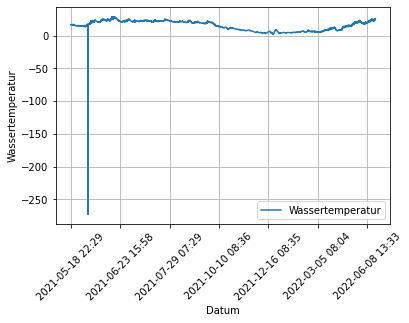

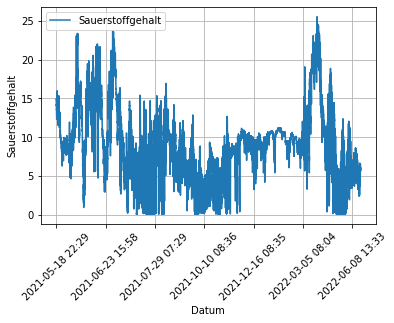

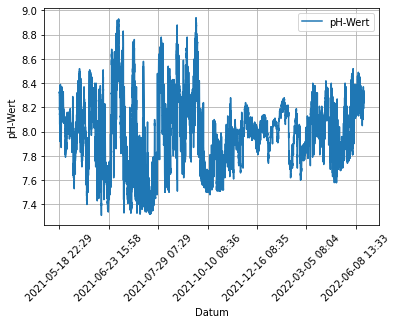

In [9]:
standard_plot(df, "Datum", "Wassertemperatur")
standard_plot(df, "Datum", "Sauerstoffgehalt")
standard_plot(df, "Datum", "pH-Wert")


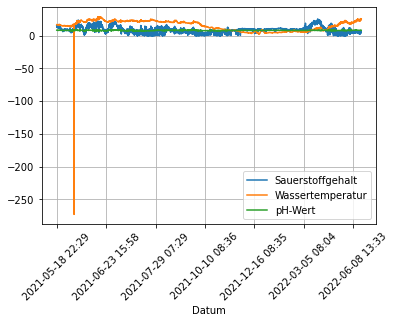

In [10]:
ax = df.plot("Datum", "Sauerstoffgehalt")
df_Wassertemperatur = df['Wassertemperatur']
df_pHWert = df['pH-Wert']
df_Wassertemperatur.plot(ax= ax)
df_pHWert.plot(ax= ax)
ax.grid()
ax.legend(['Sauerstoffgehalt', 'Wassertemperatur', 'pH-Wert'])
ax.set_autoscale_on(True)
ax.tick_params(axis= 'x', labelrotation= 45)

## Elimination outliers

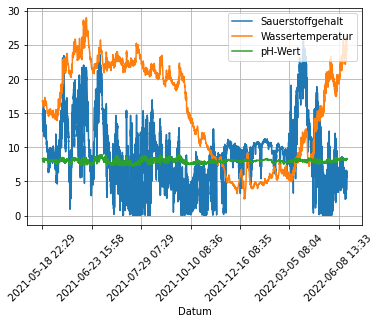

In [11]:
ax = df_preprocessed.plot("Datum", "Sauerstoffgehalt")
df_Wassertemperatur = df_preprocessed['Wassertemperatur']
df_pHWert = df_preprocessed['pH-Wert']
df_Wassertemperatur.plot(ax= ax)
df_pHWert.plot(ax= ax)
ax.grid()
ax.legend(['Sauerstoffgehalt', 'Wassertemperatur', 'pH-Wert'])
ax.set_autoscale_on(True)
ax.tick_params(axis= 'x', labelrotation= 45)

In [12]:
df_temperature.head()

,timestamp,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,condition,fallback_source_ids,icon
0,2021-05-18 00:00:00+00:00,96882,0.0,1009.5,NaN,9.7,250,9.7,100,8.4,NaN,15000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
1,2021-05-18 01:00:00+00:00,96882,0.0,1009.8,NaN,9.8,240,8.6,100,8.6,NaN,15000,NaN,13.0,rain,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
2,2021-05-18 02:00:00+00:00,96882,0.0,1010.1,NaN,9.8,230,9.7,100,8.3,NaN,15000,NaN,16.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
3,2021-05-18 03:00:00+00:00,96882,0.0,1010.2,NaN,8.0,230,8.3,75,7.3,NaN,12000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-night
4,2021-05-18 04:00:00+00:00,96882,0.0,1010.4,NaN,6.9,250,4.0,75,6.9,NaN,7000,NaN,7.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-day


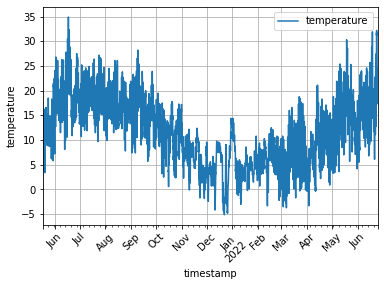

In [13]:
standard_plot(df_temperature, "timestamp", "temperature")

In [14]:
df_preprocessed_reduced = df_preprocessed.drop(['pH-Wert', 'Sauerstoffgehalt'],axis = 1)
df_preprocessed_reduced["Datum"]= pd.to_datetime(df_preprocessed_reduced["Datum"])
df_preprocessed_reduced

,Datum,Wassertemperatur
0,2021-05-18 22:29:00,16.78
1,2021-05-18 22:29:00,16.78
2,2021-05-18 22:38:00,16.76
3,2021-05-18 22:47:00,16.78
4,2021-05-18 22:59:00,16.76
...,...,...
30817,2022-06-25 22:47:00,25.63
30818,2022-06-25 23:02:00,25.62
30819,2022-06-25 23:17:00,25.59
30820,2022-06-25 23:32:00,25.57


In [30]:
df_temperature['timestamp'] = pd.to_datetime(df_temperature['timestamp'])
df_temperature.head()

,timestamp,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,condition,fallback_source_ids,icon
0,2021-05-18 00:00:00+00:00,96882,0.0,1009.5,NaN,9.7,250,9.7,100,8.4,NaN,15000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
1,2021-05-18 01:00:00+00:00,96882,0.0,1009.8,NaN,9.8,240,8.6,100,8.6,NaN,15000,NaN,13.0,rain,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
2,2021-05-18 02:00:00+00:00,96882,0.0,1010.1,NaN,9.8,230,9.7,100,8.3,NaN,15000,NaN,16.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",cloudy
3,2021-05-18 03:00:00+00:00,96882,0.0,1010.2,NaN,8.0,230,8.3,75,7.3,NaN,12000,NaN,13.0,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-night
4,2021-05-18 04:00:00+00:00,96882,0.0,1010.4,NaN,6.9,250,4.0,75,6.9,NaN,7000,NaN,7.6,dry,"{'visibility': 7003, 'temperature': 7003, 'dew...",partly-cloudy-day


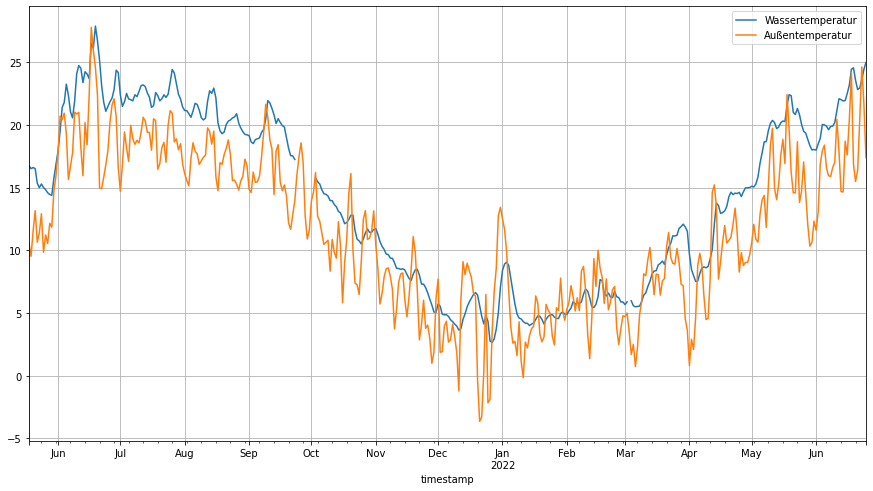

In [16]:
means_preprocessed = df_preprocessed_reduced.groupby(pd.Grouper(key="Datum",freq='1D')).mean()
means_temperature = df_temperature.groupby(pd.Grouper(key="timestamp",freq='1D')).mean()

ax = means_preprocessed.plot(figsize=(15,8))
means_temperature.temperature.plot(ax = ax)
ax.grid(True)
ax.legend(['Wassertemperatur','Außentemperatur'])

Note/Attention: Data not plausible for mid Mai 2021 to mid Juni 2021

In [17]:
means_preprocessed[125:140]

,Wassertemperatur
Datum,
2021-09-20,18.140732
2021-09-21,17.553333
2021-09-22,17.537333
2021-09-23,17.247667
2021-09-24,NaN
2021-09-25,NaN
2021-09-26,NaN
2021-09-27,NaN
2021-09-28,NaN


#### linear interpolation

In [18]:
means_preprocessed_interpolated = means_preprocessed
try: means_preprocessed_interpolated = means_preprocessed_interpolated.interpolate(method="linear")
except: print("It was already interplated")
means_preprocessed_interpolated[125:140]

,Wassertemperatur
Datum,
2021-09-20,18.140732
2021-09-21,17.553333
2021-09-22,17.537333
2021-09-23,17.247667
2021-09-24,17.099275
2021-09-25,16.950883
2021-09-26,16.802492
2021-09-27,16.654100
2021-09-28,16.505708


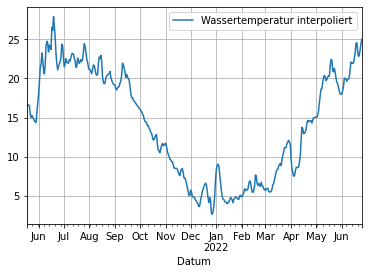

In [19]:
means_preprocessed_interpolated = means_preprocessed_interpolated.groupby(pd.Grouper(freq='1D')).mean()
ax = means_preprocessed_interpolated.plot()
ax.legend(['Wassertemperatur interpoliert'])
ax.grid()

In [21]:
print("Number of means temperature: ", len(means_temperature))
print("Number of means water temperature: ", len(means_preprocessed))

Number of means temperature:  404
Number of means water temperature:  404
